In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Load the dataset
data = pd.read_csv('KC House Data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,1131,1530,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,5813,2310,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,1350,1020,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2388,1600,0


In [ ]:
# Check the shape of the dataset
data.shape

(21613, 21)

In [ ]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
data.drop(['zipcode', 'lat', 'long', 'id'], axis=1, inplace=True)

In [7]:
data

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,1340,5650,5650,1180,0
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,1690,7639,7242,2170,400
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,2720,8062,10000,770,0
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,1360,5000,5000,1050,910
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,1800,7503,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,3,8,2009,0,1530,1509,1131,1530,0
21609,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,3,8,2014,0,1830,7200,5813,2310,0
21610,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,3,7,2009,0,1020,2007,1350,1020,0
21611,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,3,8,2004,0,1410,1287,2388,1600,0


In [ ]:
# descriptive statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [50]:
# Check for missing values and duplicates
    
data.isnull().sum()
data.duplicated().sum()

np.int64(6)

<Axes: xlabel='price', ylabel='Count'>

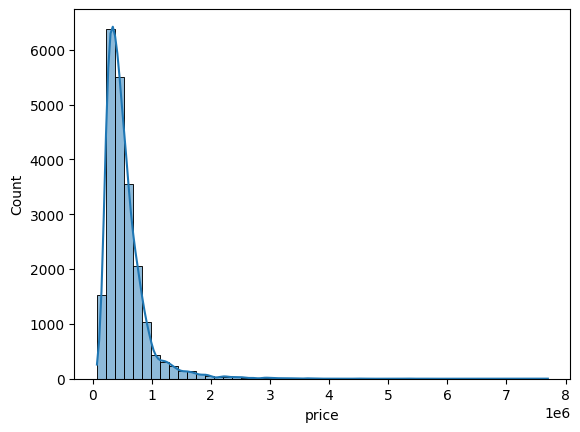

In [ ]:
# Visualize the distribution of house prices
sns.histplot(data['price'],bins = 50, kde=True)

In [ ]:
# Using Plotly for interactive histogram
px.histogram(data['price'])


In [ ]:
# Box plot to identify outliers in house prices
px.box(data, y='price')

/var/folders/r9/1c8zkb_x4d5fhpc5lbn_jndw0000gn/T/ipykernel_14128/2022051905.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='bedrooms', ylabel='count'>

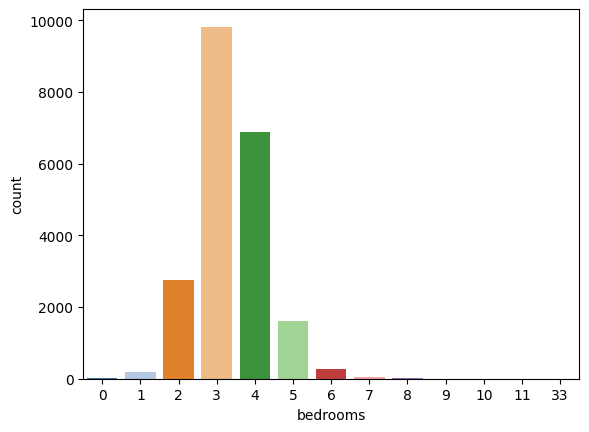

In [ ]:
# Visualize the distribution of number of bedrooms
plt.figure()
sns.countplot(x=data['bedrooms'],palette="tab20")

/var/folders/r9/1c8zkb_x4d5fhpc5lbn_jndw0000gn/T/ipykernel_14128/3025962376.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




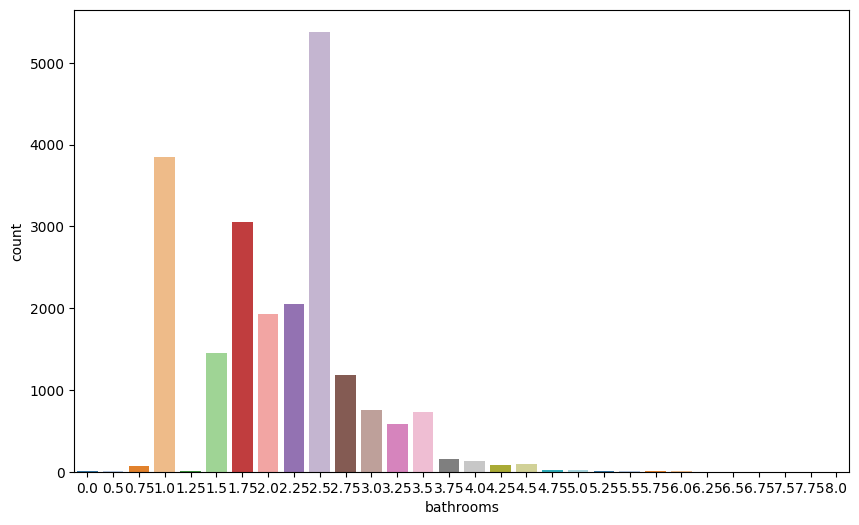

In [ ]:
# Visualize the distribution of number of bathrooms
plt.figure(figsize=(10,6))
sns.countplot(x=data['bathrooms'], palette="tab20")
plt.show()

<Axes: xlabel='floors', ylabel='count'>

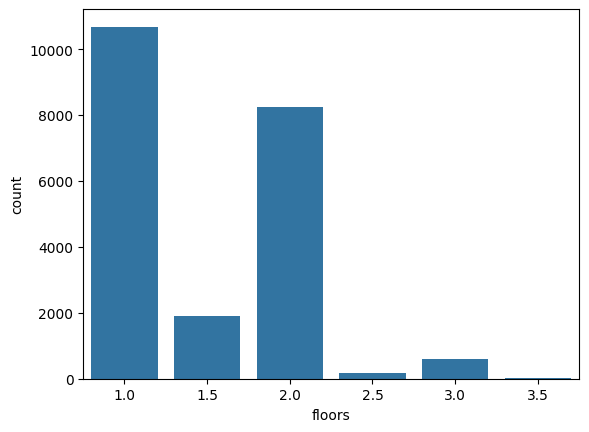

In [ ]:
# Visualize the distribution of number of floors
plt.figure()
sns.countplot(x=data['floors'])

/var/folders/r9/1c8zkb_x4d5fhpc5lbn_jndw0000gn/T/ipykernel_14128/182891978.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




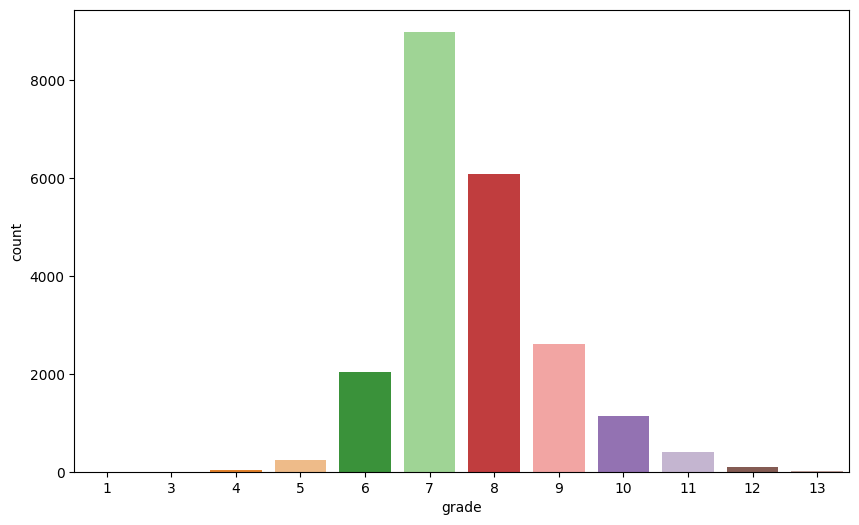

In [ ]:
# Visualize the distribution of house grades
plt.figure(figsize=(10,6))
sns.countplot(x=data['grade'], palette="tab20")
plt.show()

In [17]:
# there is no correlation between price and bedrooms
px.scatter(data, x='bedrooms', y='price', color='grade')

In [ ]:
# there is a slight correlation between price and bathrooms
px.scatter(data, x='bathrooms', y='price')

In [ ]:
# get the age of the house
data['age_of_house'] = dt.datetime.now().year - data['yr_built']


In [ ]:
# there is a negative correlation between age of house and price
px.scatter(data, x='age_of_house', y='price', color='grade')

In [ ]:
# there is a strong correlation between price and sqft_living
px.scatter(data, x='sqft_living', y='price', color='grade')

<Axes: >

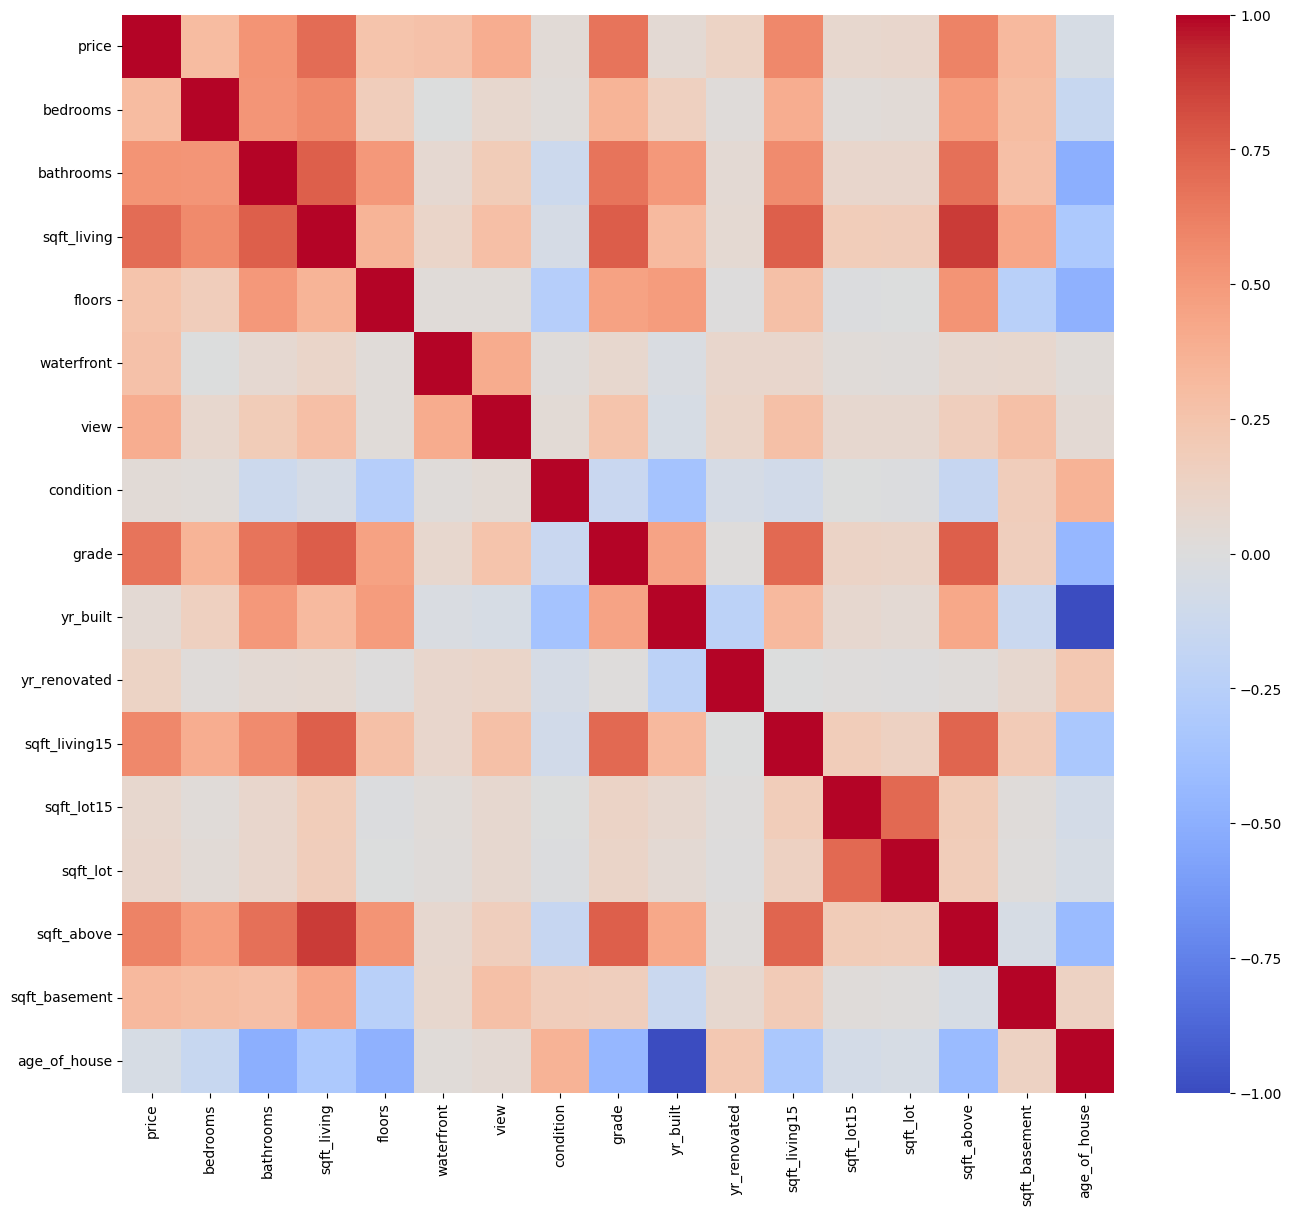

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm")
plt.show()

In [ ]:
# Prepare data for Linear Regression model
X = data['sqft_living']
Y = data['price']

X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

LR = LinearRegression()
LR.fit(X_train.array.reshape(-1, 1), Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Predicting the prices is not accurate because we are using only one feature sqft_living
y_pred = LR.predict(X_test.array.reshape(-1, 1))
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

,Actual,Predicted
3834,349950.0,254045.279654
1348,450000.0,528946.089427
20366,635000.0,656677.778816
16617,355500.0,617802.916828
20925,246950.0,426205.382744
...,...,...
1398,465000.0,465080.244732
3364,418000.0,726097.175223
18958,394250.0,689999.089091
17845,249500.0,212393.641810


In [ ]:
# Calculate Mean Squared Error
metrics.mean_squared_error(Y_test, y_pred)

68812103416.11714

In [ ]:
# Drop the date column as it is not needed
data.drop(['date'],axis = 1 ,inplace = True)

In [ ]:
# Multivariate Linear Regression
# Using multiple features to predict house prices
multivariate_features = data.drop('price', axis=1)
multivariate_target = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(multivariate_features, multivariate_target, test_size=0.3, random_state=101)
LR_multi = LinearRegression()
LR_multi.fit(X_train, Y_train)
y_pred_multi = LR_multi.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_multi})

,Actual,Predicted
3834,349950.0,499091.082636
1348,450000.0,559620.357289
20366,635000.0,469019.233039
16617,355500.0,419898.853818
20925,246950.0,247007.415580
...,...,...
1398,465000.0,432168.205118
3364,418000.0,453638.479571
18958,394250.0,604184.617063
17845,249500.0,167060.342124


In [46]:
metrics.mean_squared_error(Y_test, y_pred_multi)

47317465734.923386

In [ ]:
# Evaluate the model 

LR_multi.score(X_test, Y_test)

0.6631370045164162